##### Задача 1 
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Решение

B - группа крови
A - подсудимый является убийце
0. P(B|A) = 1
1. Дано P(B) = 0.01
2. Прокурор говорит, что P(B|~A) = 0.01
3. Из 1. прокурор делает вывод, что 1 - P(B|~A) = P(A|B) = 0.99

P(B|~A) = (P(B) * P(~A|B)) / P(~A) = 0.01 * (P(~A|B) / P(~A)) = 0.01 (из 2.) => (P(~A|B) / P(~A)) = 1, а т.к. ~A и B зависимые события, то получаем противоречие.

Прокурор неверно оценил P(B|~A), а должен был оценивать P(A|B).

##### Задача 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

4. P(A) = 1/1000000 = 0.0001% (если преступление совершить мог равноверятно любой человек)
5. Адвокат оценивает P(A|B) = 1/10000 = 0.01%

P(A|B) = P(A) * P(B|A) / P(B) = 0,01 * P(B|A), а из 0. => P(B|A) = 1

Адвокат прав

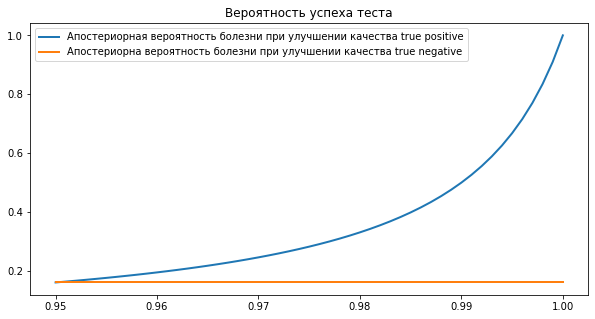

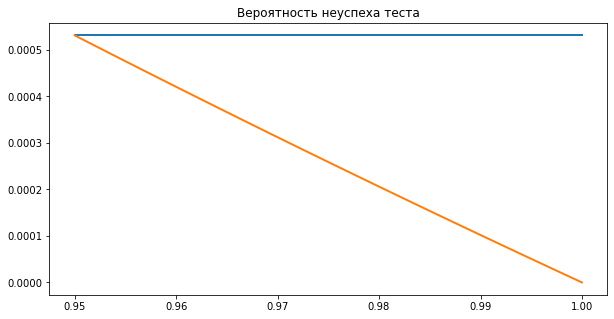

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def compute_posterior(data, prior_prob=0.01, test_success_1=0.95, test_success_2=0.95):
    if data == 1:
        return (prior_prob * test_success_1) / (prior_prob * test_success_1 + (1-prior_prob) * (1-test_success_1))
    elif data == 0:
        return (prior_prob * (1-test_success_2)) / (prior_prob * (1-test_success_2) + (1-prior_prob) * test_success_2)
    else:
        return None

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0.95, 1, 0.001)


plt.figure(figsize= (10, 5))
ys_one = vector_posterior(1, test_success_1=xs)
ys_zero = vector_posterior(1, test_success_2=xs)
plt.plot(xs, ys_one, linewidth=2, label='Апостериорная вероятность болезни при улучшении качества true positive')
plt.plot(xs, ys_zero, linewidth=2, label='Апостериорна вероятность болезни при улучшении качества true negative')
plt.title('Вероятность успеха теста')
plt.legend()
plt.show()
plt.figure(figsize= (10, 5))
ys_one = vector_posterior(0, test_success_1=xs)
ys_zero = vector_posterior(0, test_success_2=xs)
plt.plot(xs, ys_one, linewidth=2, label='Апостериорная вероятность отсутствия болезни при улучшении качества true positive')
plt.plot(xs, ys_zero, linewidth=2, label='Апостериорна вероятность отсутствия болезни при улучшении качества true negative')
plt.title('Вероятность неуспеха теста')
plt.show()